In [15]:
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sbn
from datetime import datetime

df = pd.read_csv('rfm_data.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   difference          1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 54.8+ KB


In [93]:
df.describe()

,CustomerID,TransactionAmount,OrderID,difference
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,5554.789000,513.67781,554071.398000,154.689000
std,2605.014863,286.09870,264695.448814,17.323579
min,1011.000000,12.13000,100096.000000,124.000000
25%,3273.000000,257.12000,313152.000000,139.000000
50%,5538.000000,523.56500,564671.500000,156.000000
75%,7821.750000,759.86000,783052.250000,169.000000
max,9991.000000,999.44000,999695.000000,184.000000


In [94]:
df.isna()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,difference
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [95]:
df.dropna()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,difference
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,184
1,2188,2023-04-11,463.70,Product A,176819,London,184
2,4608,2023-04-11,80.28,Product A,340062,New York,184
3,2559,2023-04-11,221.29,Product A,239145,London,184
4,9482,2023-04-11,739.56,Product A,194545,Paris,184
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,124
996,6669,2023-06-10,941.50,Product C,987025,New York,124
997,8836,2023-06-10,545.36,Product C,512842,London,124
998,1440,2023-06-10,729.94,Product B,559753,Paris,124


In [96]:
df.shape[1]

7

In [98]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [40]:
df.head()
print(df['PurchaseDate'])
#print(datetime.today().date())

0     2023-04-11
1     2023-04-11
2     2023-04-11
3     2023-04-11
4     2023-04-11
         ...    
995   2023-06-10
996   2023-06-10
997   2023-06-10
998   2023-06-10
999   2023-06-10
Name: PurchaseDate, Length: 1000, dtype: datetime64[ns]


In [129]:
today = datetime.datetime.now()
df['difference'] =   (today - df['PurchaseDate']).dt.days

In [100]:
print(difference) #check the difference of recent purchase.

0      184
1      184
2      184
3      184
4      184
      ... 
995    124
996    124
997    124
998    124
999    124
Name: PurchaseDate, Length: 1000, dtype: int64


In [101]:
df['TransactionAmount'].sum()

513677.81

In [108]:
# Calculate Recency: the number of days since the last purchase for each customer
recency = df.groupby('CustomerID')['PurchaseDate'].max().head(4)

# Calculate Frequency: the number of purchases made by each customer
frequency = df.groupby('CustomerID')['PurchaseDate'].count().head(4)

# Calculate Monetary Value: the total purchase amount for each customer
monetary_value = df.groupby('CustomerID')['TransactionAmount'].sum().head(4)
print("The Recent Purchase : {} ,\n\b The frequency since 2023 is : {} ,\n\b The Monetary value is:  {}".format(recency, frequency, monetary_value)  )

The Recent Purchase : CustomerID
1011   2023-05-08
1025   2023-05-20
1029   2023-06-10
1046   2023-04-28
Name: PurchaseDate, dtype: datetime64[ns] ,
 The frequency since 2023 is : CustomerID
1011    2
1025    1
1029    1
1046    1
Name: PurchaseDate, dtype: int64 ,
 The Monetary value is:  CustomerID
1011    1129.02
1025     359.29
1029     704.99
1046     859.82
Name: TransactionAmount, dtype: float64


In [109]:
#Let us now create a new dataframe with Recency Frequency and Monetary Value.
#We use pandas pd.DataFrame()

In [49]:
rfmDataFrame = pd.DataFrame({
    'recency': recency,
    'frequency': frequency,
    'monetary_value': monetary_value
})

In [50]:
percentages  = rfmDataFrame.rank(pct=True) #Use percentages to rank the customers.

In [51]:
#Create a RFM score.

In [87]:
RFM_Score = percentages['recency'] * 100 + percentages['frequency'] * 100 + percentages['monetary_value'] * 100
rfmDataFrame['RFM_SCORES'] = RFM_Score

In [54]:
#Rank the customers RFM now into groups.

In [88]:
def checkScore(data_frame):
    if pd.isnull(data_frame['RFM_SCORES']):
        return 'NaN Score'
    elif data_frame['RFM_SCORES'] >= 200:
        return 'High Score'
    elif (data_frame['RFM_SCORES'] >= 100) and (data_frame['RFM_SCORES'] < 200):
        return 'Mid Score'
    else:
        return 'Low Score'

In [89]:
#Apply segmentation function to create 'RFM_Segment' column
rfmDataFrame['RFM_Segment'] = rfmDataFrame.apply(checkScore, axis=1)

In [90]:
print(rfmDataFrame)

              recency  frequency  monetary_value RFM_Segment  RFM_SCORES
CustomerID                                                              
1011       2023-05-08          2         1129.02  High Score  241.966173
1025       2023-05-20          1          359.29   Mid Score  143.604651
1029       2023-06-10          1          704.99  High Score  213.213531
1046       2023-04-28          1          859.82   Mid Score  158.298097
1049       2023-05-28          1          225.72   Mid Score  146.617336
...               ...        ...             ...         ...         ...
9941       2023-04-29          1          960.53   Mid Score  169.503171
9950       2023-05-03          1          679.11   Mid Score  148.097252
9954       2023-05-29          1          798.01  High Score  204.492600
9985       2023-04-14          1           36.10   Low Score   54.704017
9991       2023-05-11          1          626.81   Mid Score  157.241015

[946 rows x 5 columns]


In [114]:
rfmDataFrame['RFM_Segment']

CustomerID
1011    High Score
1025     Mid Score
1029    High Score
1046     Mid Score
1049     Mid Score
           ...    
9941     Mid Score
9950     Mid Score
9954    High Score
9985     Low Score
9991     Mid Score
Name: RFM_Segment, Length: 946, dtype: object

In [122]:
#rfmDataFrame.loc[(rfmDataFrame['RFM_Segment'] == "High Score").count()]

In [121]:
rfmDataFrame.loc[(rfmDataFrame['RFM_Segment'] == "High Score")]

,recency,frequency,monetary_value,RFM_Segment,RFM_SCORES
CustomerID,,,,,
1011,2023-05-08,2,1129.02,High Score,241.966173
1029,2023-06-10,1,704.99,High Score,213.213531
1190,2023-05-22,1,935.03,High Score,204.228330
1305,2023-06-06,2,1234.46,High Score,289.957717
1439,2023-06-04,1,848.60,High Score,220.454545
...,...,...,...,...,...
9680,2023-04-30,2,844.60,High Score,210.782241
9824,2023-05-11,2,622.27,High Score,206.448203
9871,2023-05-07,2,1820.53,High Score,242.336152


In [123]:
#Now Plot the data

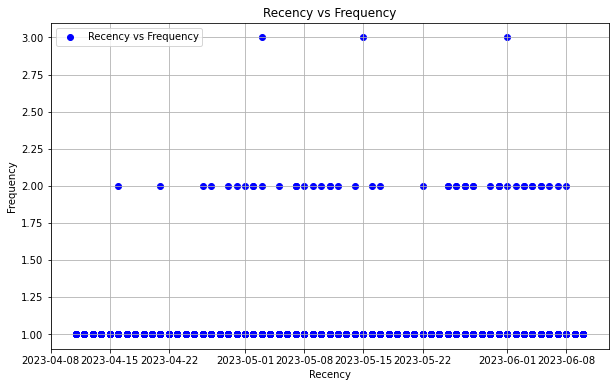

In [134]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for Recency vs Frequency
plt.scatter(rfmDataFrame['recency'], rfmDataFrame['frequency'], color='blue', label='Recency vs Frequency')

# Customize the plot
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

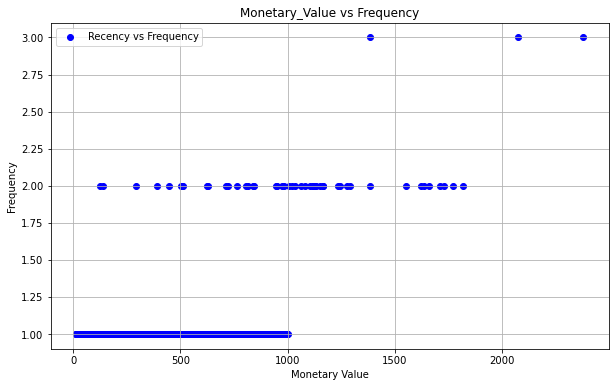

In [126]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for Recency vs Frequency
plt.scatter(rfmDataFrame['monetary_value'], rfmDataFrame['frequency'], color='blue', label='Recency vs Frequency')

# Customize the plot
plt.title('Monetary_Value vs Frequency')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

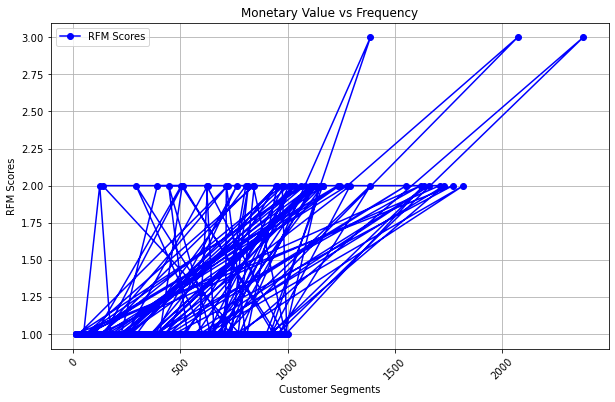

In [133]:

plt.figure(figsize=(10, 6))

# Create a line chart for RFM scores vs customer segments

plt.plot(rfmDataFrame['monetary_value'],rfmDataFrame['frequency'], marker='o', color='b', label='RFM Scores')

# Customize the plot
plt.title('Monetary Value vs Frequency')
plt.xlabel('Customer Segments')
plt.ylabel('RFM Scores')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
